In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(20.0,10.0)

#read the student data from csv file
data=pd.read_csv("wd.csv")
print(data.shape)
data.head()

(28, 3)


,DATE,WASTE PRODUCED(MT),POPULATION(MILLION)
0,2018-01-01,3989.00,2.01
1,2018-01-02,3989.62,2.04
2,2018-01-03,3990.10,2.06
3,2018-01-04,3990.14,2.10
4,2018-01-05,3990.62,2.13


In [2]:
#collecting x and y values
x=data["POPULATION(MILLION)"].values
y=data["WASTE PRODUCED(MT)"].values
z=data["DATE"].values

LINEAR REGRESSION (CREATE AND TRAIN)

In [3]:
from sklearn.linear_model import LinearRegression
x=x.reshape(-1, 1)  # values converts it into a numpy array
y=y.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(x, y)  # perform linear regression for training
Y_pred = linear_regressor.predict(x)  # make predictions

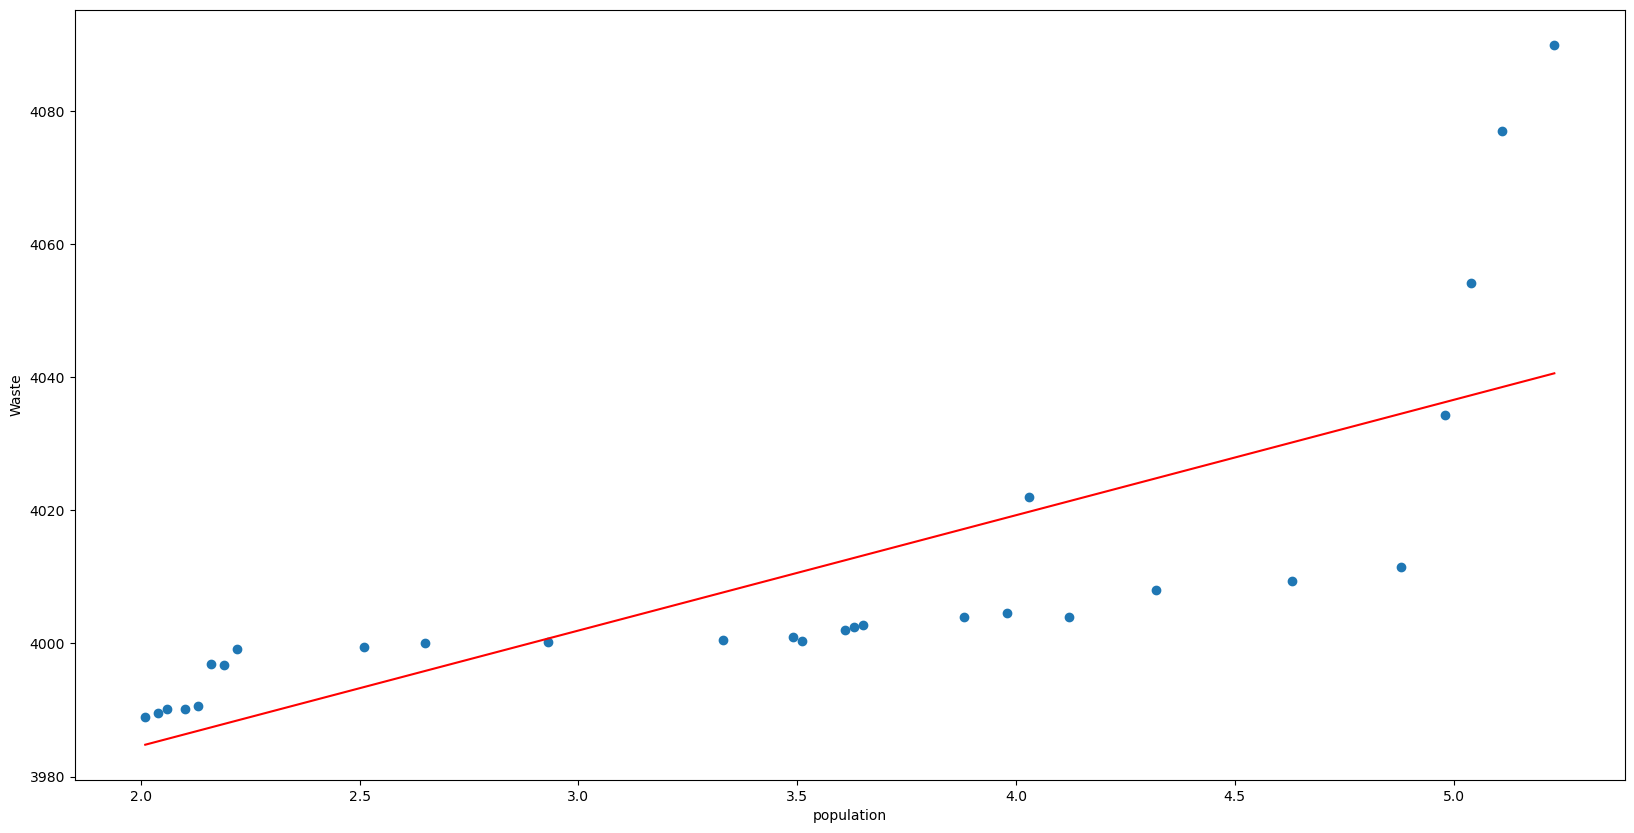

In [4]:
plt.scatter(x, y)
plt.plot(x, Y_pred, color='red')
plt.xlabel('population')
plt.ylabel('Waste')
plt.show()

polynomial regression

In [5]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(x)
  
poly.fit(X_poly, y)#for training
lin2 = LinearRegression()
lin2.fit(X_poly, y)

LinearRegression()

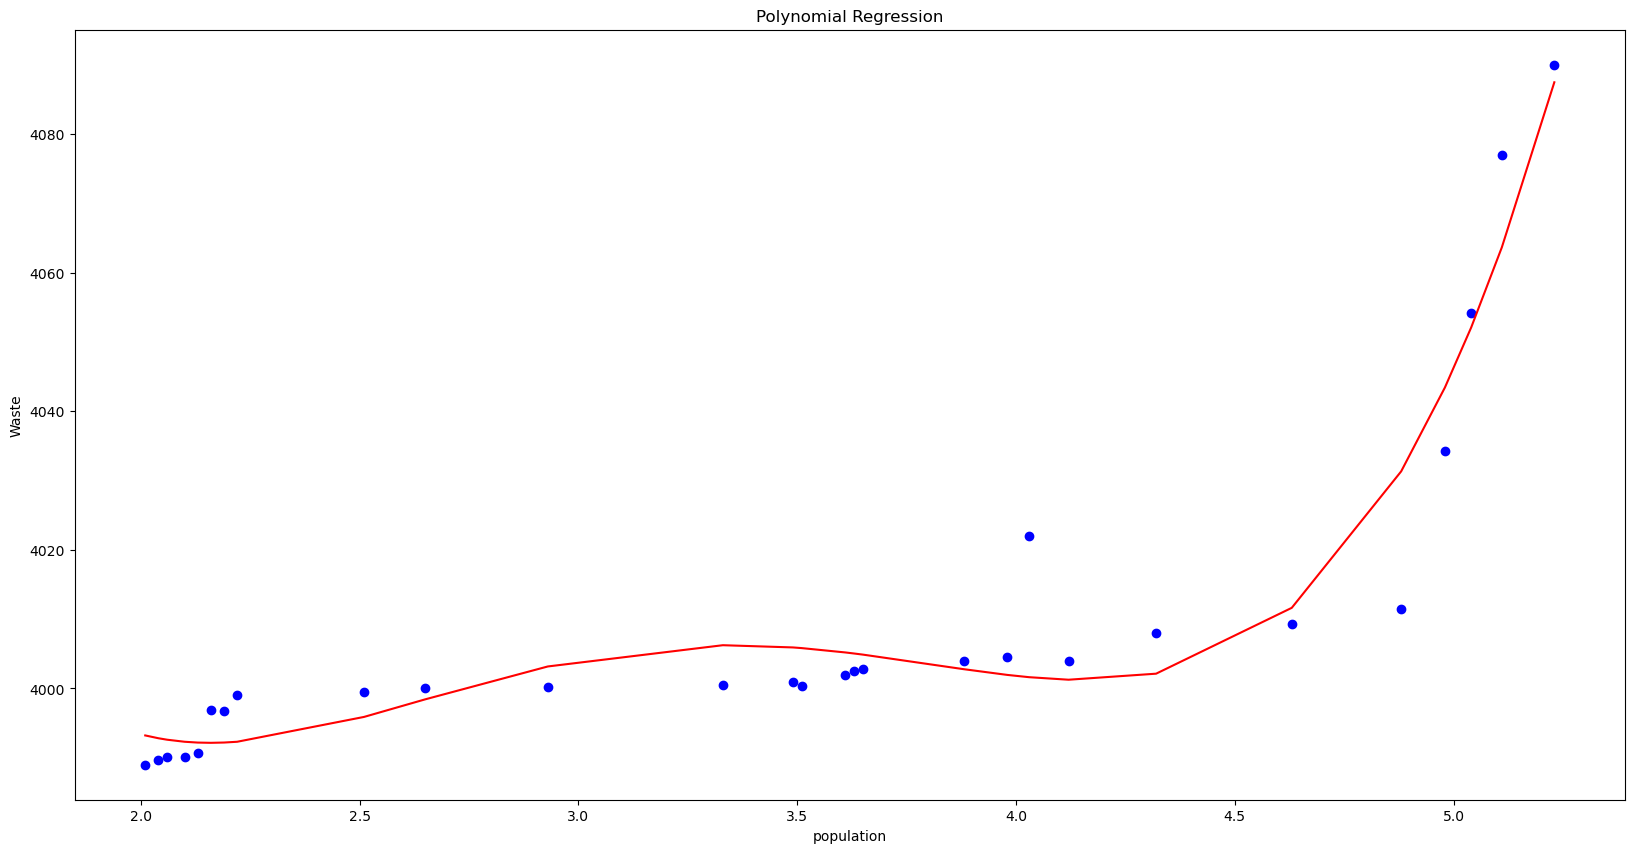

In [6]:

# Visualising the Polynomial Regression results
plt.scatter(x, y, color = 'blue')
  
plt.plot(x, lin2.predict(poly.fit_transform(x)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('population')
plt.ylabel('Waste')
  
plt.show()

PREDICT THE NEXRT VALUE

In [7]:
next_value = linear_regressor.predict(x)  # Input the next value
print("Next predicted value:", next_value)

Next predicted value: [[3984.78288992]
 [3985.30296472]
 [3985.64968125]
 [3986.34311432]
 [3986.86318912]
 [3987.38326392]
 [3987.90333872]
 [3988.42341352]
 [3993.45080325]
 [3995.87781898]
 [4000.73185045]
 [4007.66618111]
 [4010.43991338]
 [4010.78662991]
 [4012.52021258]
 [4012.86692911]
 [4013.21364565]
 [4017.20088578]
 [4018.93446845]
 [4019.80125978]
 [4021.36148418]
 [4024.82864951]
 [4030.20275578]
 [4034.53671245]
 [4036.27029511]
 [4037.31044471]
 [4038.52395258]
 [4040.60425178]]


In [8]:
from sklearn.metrics import r2_score
# Calculate the mean squared error (loss)
mse = ((next_value - y) ** 2).mean()

# Calculate the loss percentage
loss_percentage = mse / (y.var()) * 100

# Calculate the precision (R-squared score)
precision = r2_score(y, next_value)

print("Loss Percentage: {:.2f}%".format(loss_percentage))
print("Precision (R-squared score): {:.2f}".format(precision))

Loss Percentage: 42.27%
Precision (R-squared score): 0.58
